In [1]:
import torch
from torch import ones, zeros, float32, as_tensor, tensor, eye, sum, Tensor, manual_seed
from torch.distributions import MultivariateNormal, Normal
from typing import Any
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from labproject.metrics.c2st import c2st_optimal, c2st_nn, c2st_knn, c2st_rf, c2st_scores

In [21]:
from labproject.data import toy_mog_2d

In [42]:
n_samples = 5000
toy = toy_mog_2d()
samples_mog = toy.sample((n_samples,))
samples_np = samples_mog.numpy()
samples_normal_approx = Normal(samples_mog.mean(dim=0), samples_mog.std(dim=0)).sample((n_samples,)).numpy()

n_plot = 10
samples_to_plot = samples_np[0:10,:]

al=0.4
ms=6
mec='k'

densities = [samples_np, samples_normal_approx]
samples_plot = [samples_np[:20], samples_normal_approx[:20]]
titles = [r'$p_{true}(x)$', r'$p_{1}(x)$']
cmaps = ['Blues', 'Reds']

/var/folders/kv/39t9blx569l5_sxxzx89vb3c0000gn/T/ipykernel_35234/3295531989.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=4.0, w_pad=1)


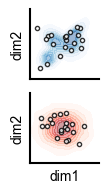

In [58]:
with mpl.rc_context(fname="../../../matplotlibrc"):
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(0.9, 2))
    for i_a, ax in enumerate(axs):
        density, samples, cmap, title = densities[i_a], samples_plot[i_a], cmaps[i_a], titles[i_a]
        sns.kdeplot(x=density[:,0], y=density[:,1], fill=True, thresh=0.05, levels=10, cmap=cmap, ax=ax, alpha=al)
        ax.plot(samples[:, 0], samples[:, 1], 'w.', ms=ms, mec=mec, alpha=0.8)
        ax.set_xticks([]); ax.set_yticks([])
        # ttl = ax.set_title(title, fontsize=12);
        ax.set_xlim([-7,4]); ax.set_ylim([-6,4])

    for i in range(2):
        axs[i].set_ylabel('dim2')
    axs[1].set_xlabel('dim1')

    fig.tight_layout(pad=4.0, w_pad=1)
    plt.savefig("svg/fig2_panel_b1.svg", bbox_inches="tight")
    plt.show()

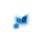

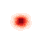

In [106]:
with mpl.rc_context(fname="../../../matplotlibrc"):
    for i in range(2):
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(0.3, 0.3))
        density, cmap = densities[i], cmaps[i]
        sns.kdeplot(x=density[:,0], y=density[:,1], fill=True, thresh=0.05, levels=10, cmap=cmap, ax=ax, alpha=1.0)
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_xlim([-7,4]); ax.set_ylim([-6,4])
        _ = ax.spines["left"].set_visible(False)
        _ = ax.spines["bottom"].set_visible(False)
    
        plt.savefig(f"svg/fig2_panel_b2_{i}.svg", bbox_inches="tight", transparent=True)
        plt.show()

In [113]:
import time
import IPython.display as IPd
from svgutils.compose import *

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_caption = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_text = {'size': '9.75pt', 'font': 'Arial'}

f = Figure(
    "17.6cm",
    "4.2cm",
    Panel(SVG("svg/fig2_panel_b1.svg").scale(svg_scale).move(10, 5), Text("b", 0, 25.0, **kwargs_caption)).move(100, -10),
    Panel(SVG("svg/fig1_illustration.svg").scale(1.5).move(10, 5)).move(200, 20),
    Panel(Text("?", 0, 25.0, **kwargs_text)).move(318, 49),
    Panel(SVG("svg/fig2_panel_b2_0.svg")).move(295, 49),
    Panel(SVG("svg/fig2_panel_b2_1.svg")).move(295, 61),
)

!mkdir -p fig
f.save("fig/fig1.svg")
svg("fig/fig1.svg")